# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Cardano price analysis: Bullish rally to push ADA past $0.6 as bulls accumulate.  Cardano price analysis shows that the market is in a consolidation phase. However, the uptrend could not be sustained, and the price started to correct lower. The correction was short-lived as bulls bought the dip and pushed the price higher again. The ADA/USD pair is trading at $0.459, and the bulls aim to move above $0.600. &#8230;  Cardano price analysis: Bullish rally to push ADA past $0.6 as bulls accumulate Read More &#187; ... [| Skaityti daugiau](https://www.cryptopolitan.com/cardano-price-analysis-2022-07-21/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- President Biden Tests Positive for Covid-19.  The White House said the president, 79, has very mild symptoms and has begun taking Paxlovid. He will isolate at the White House and continue to carry out all of his duties. ... [| Skaityti daugiau](https://www.wsj.com/articles/president-biden-tests-positive-for-covid-19-11658413867?mod=hp_lead_pos2) 

### Kainų kaita pandemijos metu

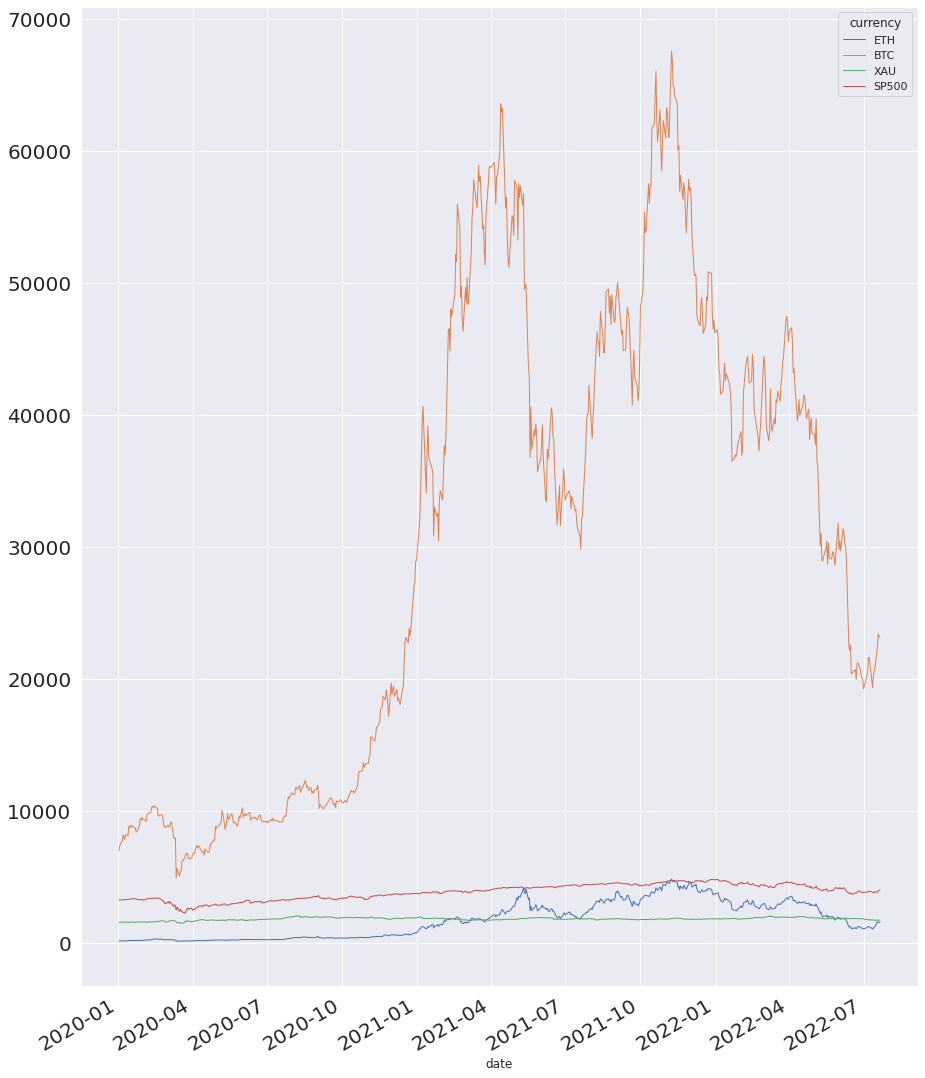

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903270,0.248518,0.920504
BTC,0.903270,1.000000,0.198765,0.866042
XAU,0.248518,0.198765,1.000000,0.375057
SP500,0.920504,0.866042,0.375057,1.000000


In [8]:
#hide ### Koreliacijos matrica.

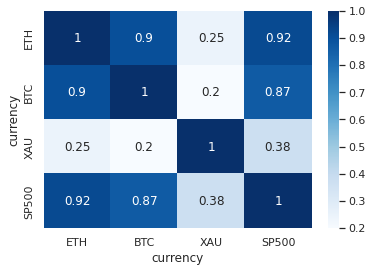

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')